## chapter 14 모델 성능 향상 시키기
와인 자료 활용 -> 레드와인, 화이트와인





In [1]:
# 모델 : Sequential, 레이어 : Dense, 학습과 테스트 : 8:2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv('./data/wine.csv',header=None)
df.head() # 마지막 속성이 클래스
X = df.iloc[:,0:-1] # 클래스를 결정하는 속성 분리
y = df.iloc[:,-1]


In [2]:
# 데이터를 학습데이터와 테스트 데이터로 분리 -> train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)



In [ ]:
# 모델 생성
model = Sequential()
model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

In [4]:
# 모델 컴파일 : loss, optimizer, matrics 
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train,y_train,epochs=50,validation_split=0.25)

Epoch 1/50
122/122 [==============================] - 3s 7ms/step - loss: 3.3283 - accuracy: 0.6331 - val_loss: 0.2209 - val_accuracy: 0.9292
Epoch 2/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.9358 - val_loss: 0.1919 - val_accuracy: 0.9300
Epoch 3/50
122/122 [==============================] - 1s 4ms/step - loss: 0.1602 - accuracy: 0.9438 - val_loss: 0.1894 - val_accuracy: 0.9346
Epoch 4/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9466 - val_loss: 0.1770 - val_accuracy: 0.9438
Epoch 5/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1346 - accuracy: 0.9515 - val_loss: 0.1686 - val_accuracy: 0.9408
Epoch 6/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9530 - val_loss: 0.1560 - val_accuracy: 0.9431
Epoch 7/50
122/122 [==============================] - 1s 6ms/step - loss: 0.1183 - accuracy: 0.9564 - val_loss: 0.1511 - val_accuracy: 0.9477
Epoch 

In [7]:
history.history['val_accuracy']

[0.9292307496070862,
 0.9300000071525574,
 0.9346153736114502,
 0.9438461661338806,
 0.9407692551612854,
 0.9430769085884094,
 0.947692334651947,
 0.9530768990516663,
 0.942307710647583,
 0.949999988079071,
 0.9530768990516663,
 0.9592307806015015,
 0.9653846025466919,
 0.9615384340286255,
 0.9630769491195679,
 0.9638461470603943,
 0.9676923155784607,
 0.9676923155784607,
 0.9738461375236511,
 0.9515384435653687,
 0.9676923155784607,
 0.9723076820373535,
 0.9561538696289062,
 0.9746153950691223,
 0.9753845930099487,
 0.9553846120834351,
 0.9584615230560303,
 0.9753845930099487,
 0.9761538505554199,
 0.9746153950691223,
 0.9715384840965271,
 0.9784615635871887,
 0.9769230484962463,
 0.9769230484962463,
 0.9784615635871887,
 0.9746153950691223,
 0.9630769491195679,
 0.9607692360877991,
 0.9769230484962463,
 0.9599999785423279,
 0.9707692265510559,
 0.9830769300460815,
 0.9823076725006104,
 0.9676923155784607,
 0.9800000190734863,
 0.9800000190734863,
 0.9792307615280151,
 0.9823076725006

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

filename = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'

# 학습 중에 모델 저장
checkpoint = ModelCheckpoint(filepath=filename, verbose=True)

# 모델 생성
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.25, verbose=0, callbacks=[checkpoint])

# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])



Epoch 1: saving model to ./data/model\01-0.9162.hdf5

Epoch 2: saving model to ./data/model\02-0.9346.hdf5

Epoch 3: saving model to ./data/model\03-0.9362.hdf5

Epoch 4: saving model to ./data/model\04-0.9369.hdf5

Epoch 5: saving model to ./data/model\05-0.9408.hdf5

Epoch 6: saving model to ./data/model\06-0.9454.hdf5

Epoch 7: saving model to ./data/model\07-0.9500.hdf5

Epoch 8: saving model to ./data/model\08-0.9508.hdf5

Epoch 9: saving model to ./data/model\09-0.9554.hdf5

Epoch 10: saving model to ./data/model\10-0.9485.hdf5

Epoch 11: saving model to ./data/model\11-0.9569.hdf5

Epoch 12: saving model to ./data/model\12-0.9669.hdf5

Epoch 13: saving model to ./data/model\13-0.9608.hdf5

Epoch 14: saving model to ./data/model\14-0.9569.hdf5

Epoch 15: saving model to ./data/model\15-0.9669.hdf5

Epoch 16: saving model to ./data/model\16-0.9662.hdf5

Epoch 17: saving model to ./data/model\17-0.9746.hdf5

Epoch 18: saving model to ./data/model\18-0.9746.hdf5

Epoch 19: saving m

In [21]:
# 모델 학습을 2000회 실행


# 모델 생성
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
hist = model.fit(X_train, y_train, epochs=2000, validation_split=0.25, 
                 verbose=0,batch_size=500)



Text(0, 0.5, 'loss')

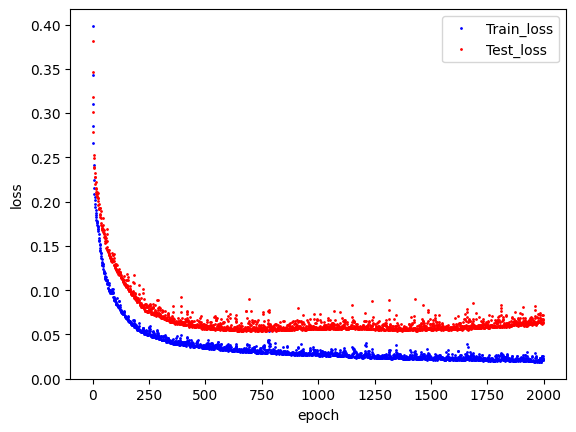

In [27]:
# 실행한 결과를 그래프로 확인 -> 과적합 여부

import matplotlib.pyplot as plt

hist_df = pd.DataFrame(hist.history)
hist_df.head()
y_loss = hist_df.loss
y_vloss = hist_df['val_loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss,'o',c='blue',markersize=1,label='Train_loss')
plt.plot(x_len,y_vloss,'o',c='red',markersize=1,label='Test_loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

In [33]:
# 중단 함수를 이용해서 최상의 모델을 찾음
from tensorflow.keras.callbacks import EarlyStopping

# 학습이 자동 중단되는 옵션 설정
early_stopping = EarlyStopping(monitor='val_loss',patience = 10)

# 모델저장
model_name = './data/model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath=model_name,monitor='val_loss',verbose=0,
                             save_best_only=True)

# 모델 생성
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


hist = model.fit(X_train,y_train,epochs=2000,batch_size=500,
                 validation_split=0.25,
                 callbacks = [early_stopping,checkpoint])



Epoch 1/2000
8/8 [==============================] - 0s 52ms/step - loss: 0.0203 - accuracy: 0.9949 - val_loss: 0.0638 - val_accuracy: 0.9923
Epoch 2/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0200 - accuracy: 0.9949 - val_loss: 0.0628 - val_accuracy: 0.9915
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0191 - accuracy: 0.9964 - val_loss: 0.0642 - val_accuracy: 0.9915
Epoch 4/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0196 - accuracy: 0.9959 - val_loss: 0.0642 - val_accuracy: 0.9908
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0195 - accuracy: 0.9959 - val_loss: 0.0640 - val_accuracy: 0.9908
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0191 - accuracy: 0.9962 - val_loss: 0.0640 - val_accuracy: 0.9915
Epoch 7/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.0640 - val_accuracy: 0.9908
Epoch 8/2000
